In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Creating a sample dataset
data = {
    'Area': [2600, 3000, 1800, 2200, 4000, 3500, 2800, 3200, 4100, 1900, 2400, 3300, 2700, 3600, 2900],
    'Bedrooms': [3, 4, 2, 3, 5, 4, 3, 4, 5, 2, 3, 4, 3, 4, 3],
    'Bathrooms': [2, 3, 1, 2, 4, 3, 2, 3, 4, 1, 2, 3, 2, 3, 2],
    'Age': [20, 15, 30, 25, 10, 8, 18, 12, 7, 28, 24, 11, 22, 9, 19],
    'Location': ['Delhi', 'Mumbai', 'Chennai', 'Delhi', 'Bangalore', 'Mumbai', 'Chennai', 'Delhi', 'Bangalore', 
                 'Chennai', 'Delhi', 'Bangalore', 'Delhi', 'Mumbai', 'Chennai'],
    'Price': [5500000, 7500000, 3200000, 4200000, 9500000, 8700000, 5000000, 6900000, 10200000, 3400000, 
              4400000, 9700000, 4800000, 8900000, 5300000]
}

df = pd.DataFrame(data)
df.head()


,Area,Bedrooms,Bathrooms,Age,Location,Price
0,2600,3,2,20,Delhi,5500000
1,3000,4,3,15,Mumbai,7500000
2,1800,2,1,30,Chennai,3200000
3,2200,3,2,25,Delhi,4200000
4,4000,5,4,10,Bangalore,9500000


In [3]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       15 non-null     int64 
 1   Bedrooms   15 non-null     int64 
 2   Bathrooms  15 non-null     int64 
 3   Age        15 non-null     int64 
 4   Location   15 non-null     object
 5   Price      15 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 852.0+ bytes
None
              Area   Bedrooms  Bathrooms        Age         Price
count    15.000000  15.000000  15.000000  15.000000  1.500000e+01
mean   2933.333333   3.466667   2.466667  17.200000  6.480000e+06
std     698.638131   0.915475   0.915475   7.561179  2.426991e+06
min    1800.000000   2.000000   1.000000   7.000000  3.200000e+06
25%    2500.000000   3.000000   2.000000  10.500000  4.600000e+06
50%    2900.000000   3.000000   2.000000  18.000000  5.500000e+06
75%    3400.000000   4.000000   3.000000  23.000000  8.800000e+0

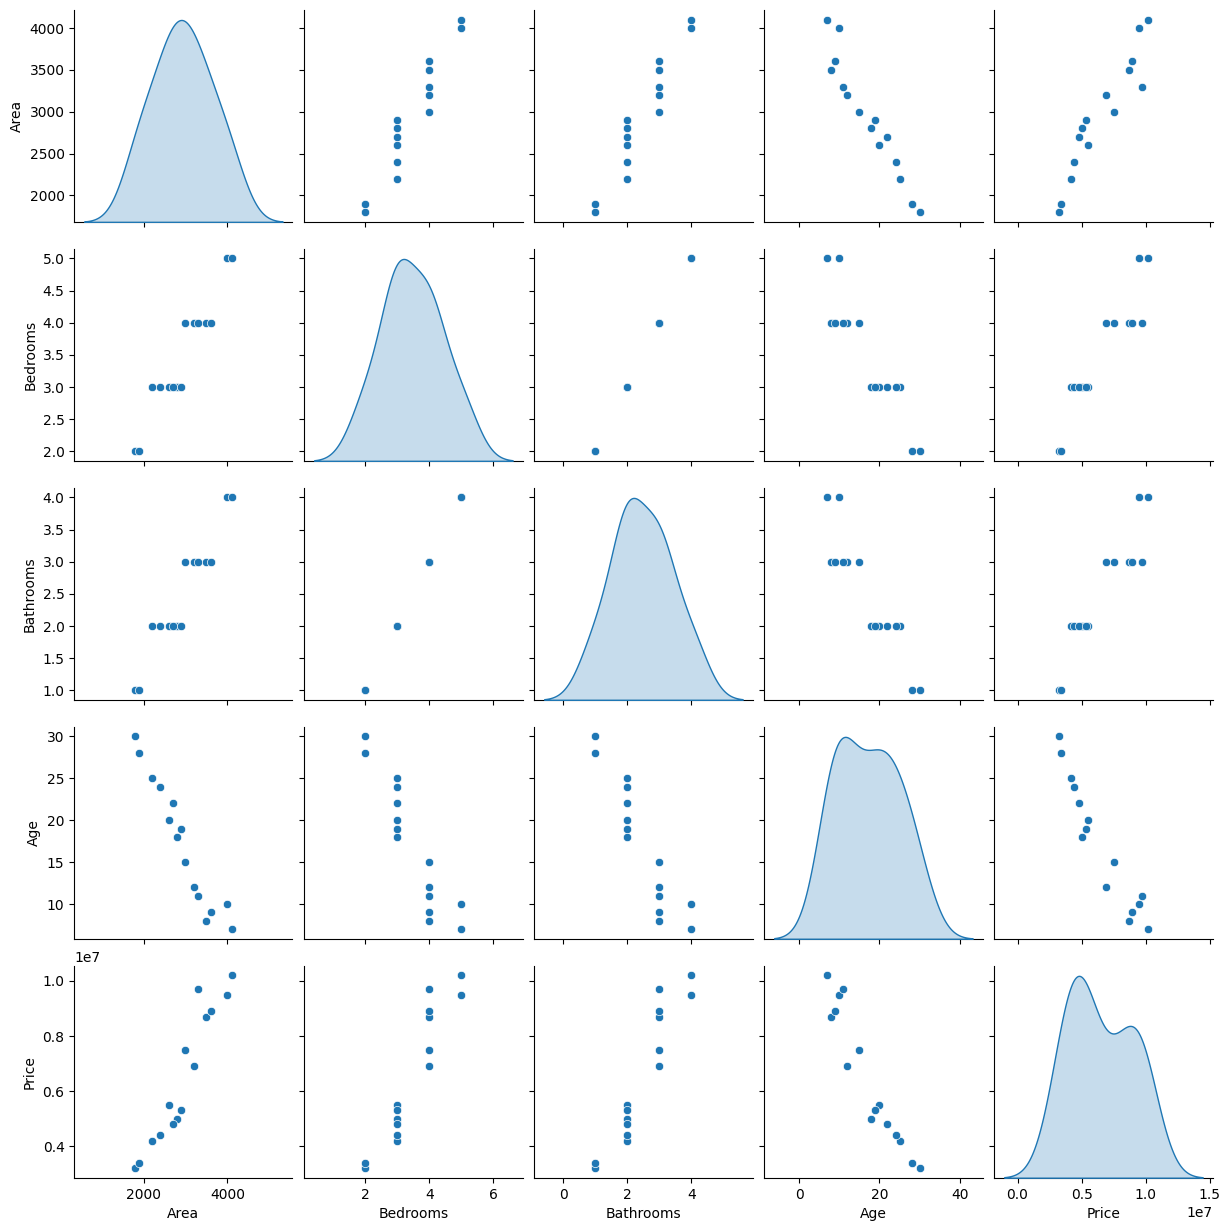

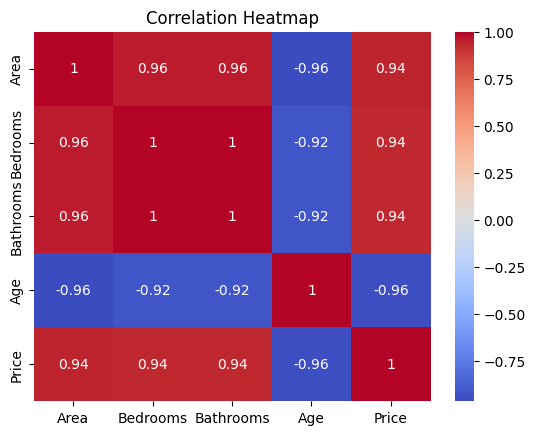

In [4]:
sns.pairplot(df, diag_kind='kde')
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [5]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df.head()


,Area,Bedrooms,Bathrooms,Age,Price,Location_Chennai,Location_Delhi,Location_Mumbai
0,2600,3,2,20,5500000,False,True,False
1,3000,4,3,15,7500000,False,False,True
2,1800,2,1,30,3200000,True,False,False
3,2200,3,2,25,4200000,False,True,False
4,4000,5,4,10,9500000,False,False,False


In [6]:
X = df.drop('Price', axis=1)
y = df['Price']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_pred = model.predict(X_test)

print("✅ Model Evaluation Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

✅ Model Evaluation Results:
Mean Absolute Error (MAE): 258761.15185573976
Mean Squared Error (MSE): 100270451440.3056
Root Mean Squared Error (RMSE): 316655.09855409816
R² Score: 0.9853833161165735


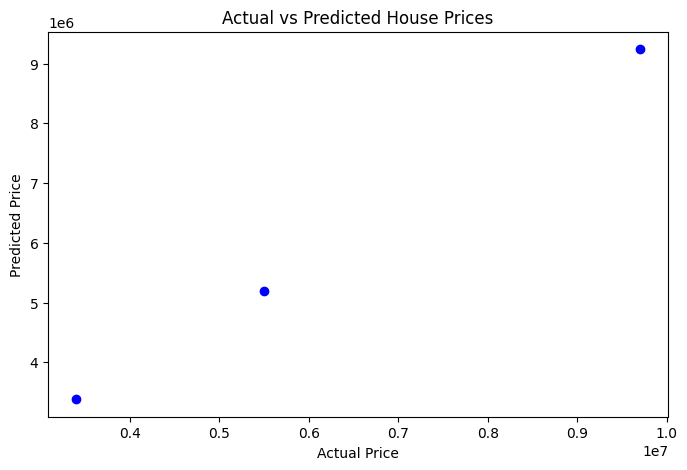

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [12]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                   Coefficient
Area              2.580484e+02
Bedrooms         -6.538718e+03
Bathrooms        -6.538718e+03
Age              -1.714425e+05
Location_Chennai -2.608918e+06
Location_Delhi   -2.329996e+06
Location_Mumbai  -9.486189e+05


In [21]:
new_data = pd.DataFrame([[2500, 3, 2, 15, 0, 1, 0]], columns=X.columns)
predicted_price = model.predict(new_data)
print("Predicted Price: ₹", round(predicted_price[0], 2))



Predicted Price: ₹ 6031807.79


In [22]:
import joblib
joblib.dump(model, 'house_price_model.pkl')



['house_price_model.pkl']